In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.model_selection import train_test_split

data = pd.read_csv(r'C:\Users\\perro\Downloads\titanic\train.csv')
# test_data = r'C:\Users\perro\Downloads\titanic\test.csv'

y = data.Survived
X = data.drop(['Survived'], axis=1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size= 0.8,
                                                                test_size=0.2)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10
                    and X_train_full[cname].dtype == 'object']
                    
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
# X_train = pd.read_csv(train_path)
# titanic_test = pd.read_csv(test_path)

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 8 columns):
Sex            712 non-null object
Embarked       710 non-null object
PassengerId    712 non-null int64
Pclass         712 non-null int64
Age            572 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [4]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


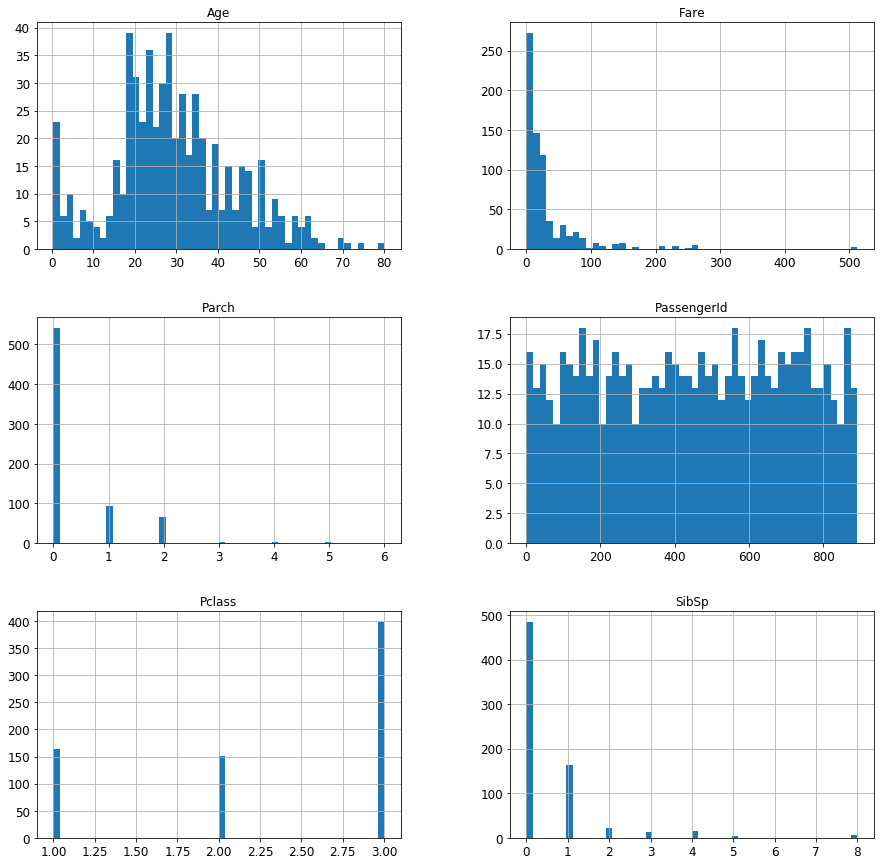

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train.hist(bins=50, figsize=(15,15))
plt.show()

In [6]:
corr_matrix = data.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

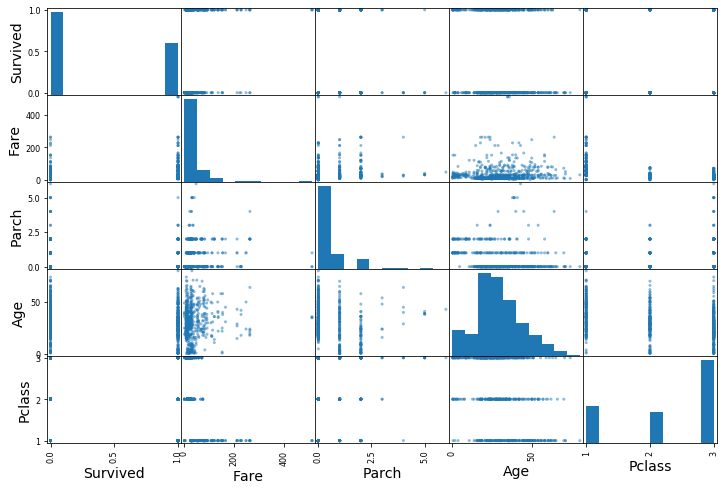

In [7]:
from pandas.plotting import scatter_matrix
features = ['Survived', 'Fare', 'Parch',
            'Age', 'Pclass']
scatter_matrix(data[features], figsize=(12, 8))
plt.show()

In [8]:
passengers = data.copy()
passengers["Pclass_vs_Fare"] = passengers["Pclass"] / passengers["Fare"]
passengers["Pclass_vs_Age"] = passengers["Pclass"] / passengers["Age"]
passengers["Fare_vs_Age"] = passengers["Fare"] / passengers["Age"]
passengers["Age_vs_Fare"] = passengers["Age"] / passengers["Fare"]
corr_matrix = passengers.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived          1.000000
Fare              0.257307
Fare_vs_Age       0.138080
Pclass_vs_Age     0.101245
Parch             0.081629
PassengerId      -0.005007
SibSp            -0.035322
Age              -0.077221
Pclass_vs_Fare   -0.325686
Pclass           -0.338481
Age_vs_Fare      -0.346014
Name: Survived, dtype: float64

In [9]:
#Survived=True or Survived=False
#891 booleans
data.Survived.count()

891

In [10]:
#only 38.3% of people survived 
data.Survived.sum() / data.Survived.count()

0.3838383838383838

In [11]:
#Compare chances of survival between men and women
data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

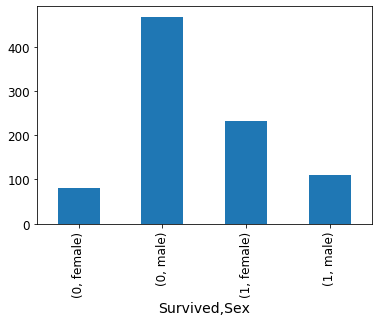

In [12]:
data.groupby(['Survived','Sex'])['Survived'].count().plot(kind="bar")

In [13]:
print("% of women survived: ", data[data.Sex == 'female'].Survived.sum() / data[data.Sex == 'female'].Survived.count())
print("% of men survived: ", data[data.Sex == 'male'].Survived.sum() / data[data.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:  0.18890814558058924


In [14]:
data.groupby(['Survived', 'Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

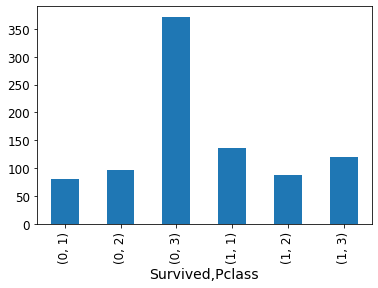

In [15]:
data.groupby(['Survived', 'Pclass'])['Survived'].count().plot(kind="bar")
plt.show()

In [16]:
print("% of 3rd class survived:", data[data.Pclass == 3].Survived.sum() / data[data.Pclass ==3].Survived.count())
print("% of 2nd class survived:", data[data.Pclass == 2].Survived.sum() / data[data.Pclass ==2].Survived.count())
print("% of 1st class survived:", data[data.Pclass == 1].Survived.sum() / data[data.Pclass ==1].Survived.count())

% of 3rd class survived: 0.24236252545824846
% of 2nd class survived: 0.47282608695652173
% of 1st class survived: 0.6296296296296297


### Train a Binary Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])

model = RandomForestClassifier(n_estimators=100,random_state=42)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_valid)
preds

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(preds, y_valid)

0.1564245810055866

In [19]:
print(preds.shape)
print(y_valid.shape)

(179,)
(179,)
